## Open SRT data and compare to convolved Archive

In [55]:
#2: pas assez de parametres                                                                                         
#3: mauvais parametre                                                                                               
#3: fichier Fits introuvable                                                                                        
#5: mauvaise lecture du fichier                                                                                     


import numpy
from numpy import *
from astropy.io import fits
import sys
import scipy.optimize
import numpy as np
from matplotlib import pylab as plt
%matplotlib notebook



In [56]:
#creation du nom du fichier en fonction du parametre l                                                              
path="../Data/SRT/fits/"
fileName="Vincent-2019:07:08:18:17:13:8-22-0-SRT-Krakow-3m.fits"
filename = path + fileName

hdulist = fits.open(str(filename))    #lecture du fichier                                                 


try:
        prihdr = hdulist[0].header
        data = hdulist[0].data          #recuperation des donnees                                                   
        # Take the channel/velocity conversion in the header                                                        
        # Compute rx the velocity vector                                                                            
        freq0=prihdr['CRVAL1']    # Hz                                                                              
        deltaf=prihdr['CDELT1']   # Hz                                                                              
        Nchan=prihdr['NAXIS1']
        Vlsr=prihdr['VELO-LSR']
        nvit0=prihdr['CRPIX1']
        frest=prihdr['RESTFREQ']
        myLong=prihdr['CRVAL2']
        myLat=prihdr['CRVAL3']
        myEl=prihdr['ELEVATIO']
        myAz=prihdr['AZIMUTH']
        myTelescope=prihdr['TELESCOP']
#        for key in prihdr.iterkeys():
#            if key=="OBSTIME":
#                obsTime=prihdr['OBSTIME']
#        else:
        obsTime=0.
        c=299792.458 # km/s                                                                                         
        deltavit=(-deltaf*c/(freq0))

except IndexError:
        print("IndexError")
        exit(5)

print(myTelescope)
print(myLong)
rx=np.zeros(Nchan,float)
rx2=np.zeros(Nchan,float)
ry=data

for i in range(Nchan):
    #rx[i]=-nvit0*deltavit+i*deltavit                                                                               
    rx[i]=-nvit0*deltavit+i*deltavit-Vlsr


freq0=freq0/1.e6
frest=frest/1.e6
deltaf=deltaf/1.e6
deltaV=-deltaf*c/(frest)
Nchan0=int(Nchan/2.)
velo=np.zeros(Nchan,float)
Voffset=((frest-freq0)/frest)*c
for j in range(Nchan):
        rx[j]=-Nchan0*deltaV+j*deltaV+Voffset-Vlsr
        rx2[j]=-Nchan0*deltaf+j*deltaf+freq0
        
        
if(myLong < 0 or myLong > 360):
        myLong = myLong % 360
if(myLat < -90 or myLat > 90):
        myLat = myLat % 90

sigma=7./(8.*log(2))**0.5
w=0.

#path = "../"




SRT-Krakow-3m
22


In [57]:
if myTelescope == "SRT-Paris-2m":
        data[120:131]=data[138]
        data[105:108]=data[138]
        print("Flag Parasite Paris2m")


if myTelescope == "SRT-Paris-3m":
        data[120:131]=data[138]
        data[105:108]=data[138]
        print("Flag Parasite Paris3m")




<IPython.core.display.Javascript object>


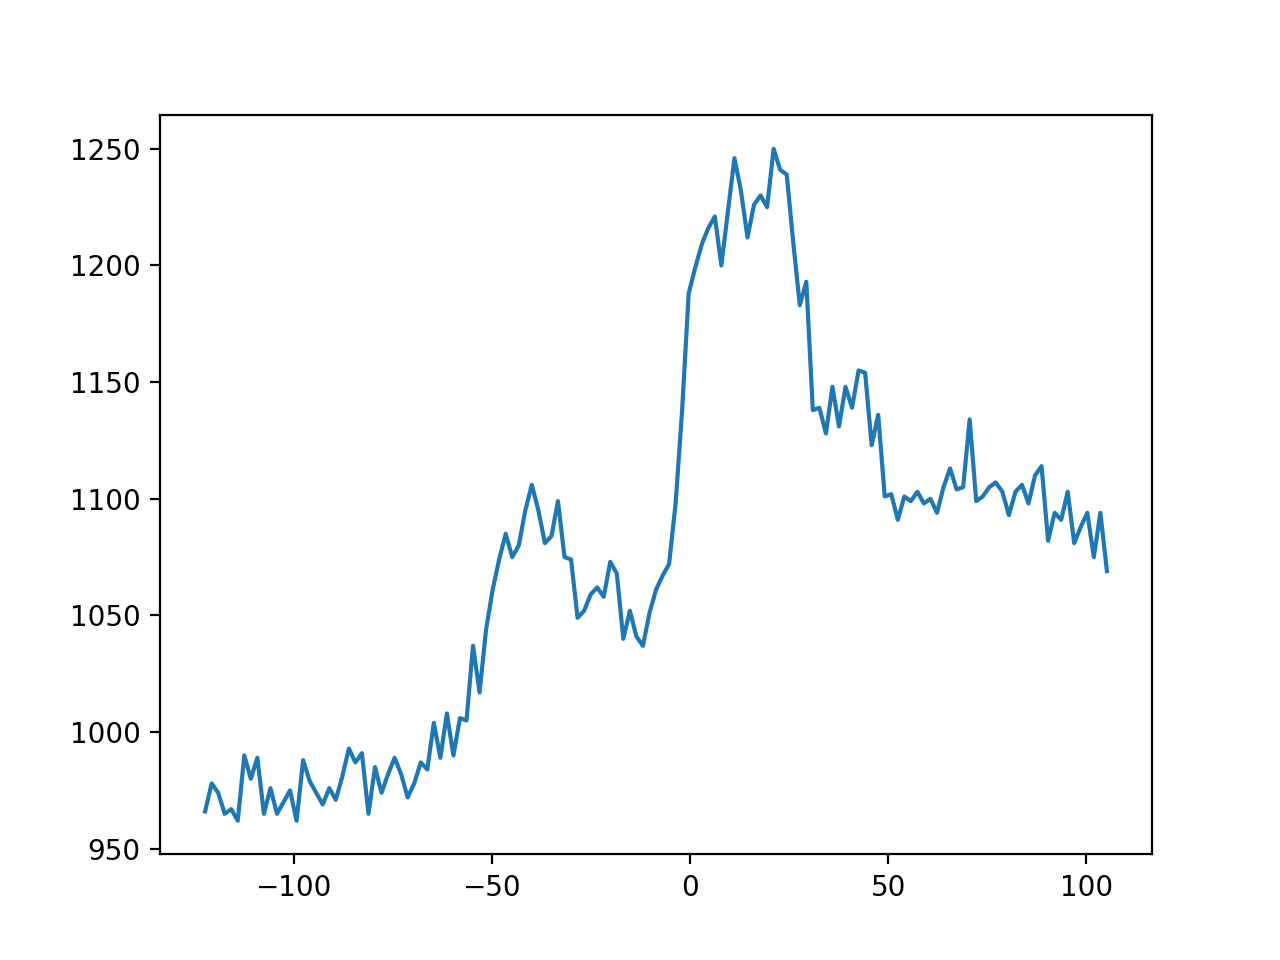

In [58]:
plt.plot(rx, data)

In [ ]:
spectra=np.zeros(893,float)
for i in range(5):
    myfile=(int(float(myLong)-i))

    #filename = "../Data/FitsBD/L"+ '{0:03d}'.format(myfile) +"0.fits"
    fname = "L"+ '{0:03d}'.format(myfile) +"0.fits"
    filename = "http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat?-plus=-%2b&VIII/76/bvmaps/"+str(fname)


    try:
        hdulist = fits.open(str(filename))    #lecture du fichier                                                \
                                                                                                                    
    except IOError:
        exit(4)

#    print(hdulist[0].header)
#    print((hdulist[0].data))



    for j in range(10):
        jlat=int(2.*(90+myLat)-j)
        LABdata = hdulist[0].data[0][jlat]
        spectra=spectra+LABdata*exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)
        w=w+exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)
    for j in range(1,10):
        jlat=int(2.*(90+myLat)+j)
        LABdata = hdulist[0].data[0][jlat]
        spectra=spectra+LABdata*exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)
        w=w+exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)


for i in range(1,5):
    myfile=(int(float(myLong)+i))

    #filename = "../Data/FitsBD/L"+ '{0:03d}'.format(myfile) +"0.fits"
    fname = "L"+ '{0:03d}'.format(myfile) +"0.fits"
    filename = "http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat?-plus=-%2b&VIII/76/bvmaps/"+str(fname)

    try:
        hdulist = fits.open(str(filename))    #lecture du fichier                                                \
                                                                                                                    
    except IOError:
        exit(4)

    for j in range(1,10):
        jlat=int(2.*(90+myLat)-j)
        LABdata = hdulist[0].data[0][jlat]
        spectra=spectra+LABdata*exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)
        w=w+exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)
    for j in range(1,10):
        jlat=int(2.*(90+myLat)+j)
        LABdata = hdulist[0].data[0][jlat]
        spectra=spectra+LABdata*exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)
        w=w+exp(-float(i)**2/2./sigma**2)*exp(-float(j/2.)**2/2./sigma**2)


maxSpectra = max(spectra[306:557])/w
data = 1.0*data/max(data)*maxSpectra

<IPython.core.display.Javascript object>


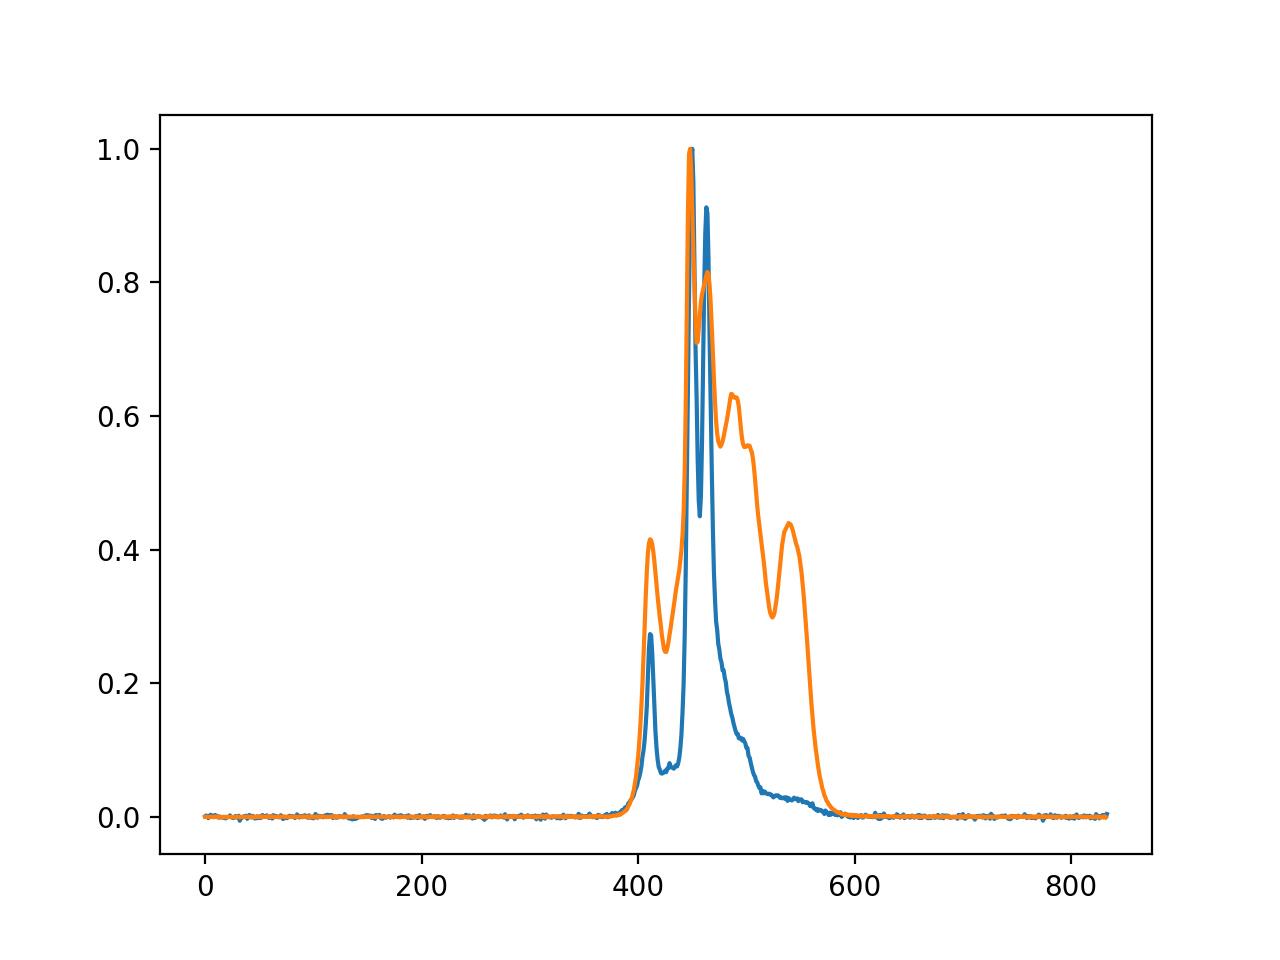

In [54]:
plt.figure(10)
plt.plot(LABdata/max(LABdata))
plt.plot(spectra/max(spectra))
plt.show()